## Sklearn의 기본 데이터

### 유방암 데이터 활용.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
cancer

In [ ]:
type(cancer)

In [ ]:
dir(cancer)

In [ ]:
cancer.data.shape #(569,30)

In [ ]:
cancer.feature_names

In [ ]:
cancer.target_names # malignant, benign

In [ ]:
cancer.target

In [ ]:
np.bincount(cancer.target) #빈도수 체크

In [ ]:
print(cancer.DESCR)

In [ ]:
for i,name in enumerate(cancer.feature_names):
    print('%02d : %s' %(i,name))

In [ ]:
maligant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

In [ ]:
import numpy as np
hist, bin_edges = np.histogram([1, 1, 2, 2, 2, 2, 3], bins = range(5))
print(hist,bin_edges)

[0 2 4 1] [0 1 2 3 4]


In [ ]:
_,bins = np.histogram(cancer.data[:,0],bins=20) #20개로 잘라주세요.
print(_) #도수
print(bins) #어떻게 간격을 적용한건지?

[ 4 15 31 48 93 92 71 58 32 23 22 28 27 11  2  5  2  2  0  3]
[ 6.981    8.03745  9.0939  10.15035 11.2068  12.26325 13.3197  14.37615
 15.4326  16.48905 17.5455  18.60195 19.6584  20.71485 21.7713  22.82775
 23.8842  24.94065 25.9971  27.05355 28.11   ]


In [ ]:
plt.hist(maligant[:,0], bins=bins, alpha=0.3)
plt.hist(benign[:,0], bins=bins, alpha=0.3)
plt.title(cancer.feature_names[0])

In [ ]:
plt.figure(figsize=(20,15))

for col in range(30):
    plt.subplot(8,4,col+1)
    _,bins = np.histogram(cancer.data[:,col],bins=20)
    plt.hist(maligant[:,col],bins=bins,alpha=0.3)
    plt.hist(benign[:,col],bins=bins,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0:plt.legend(cancer.target_names)
    plt.xticks([])

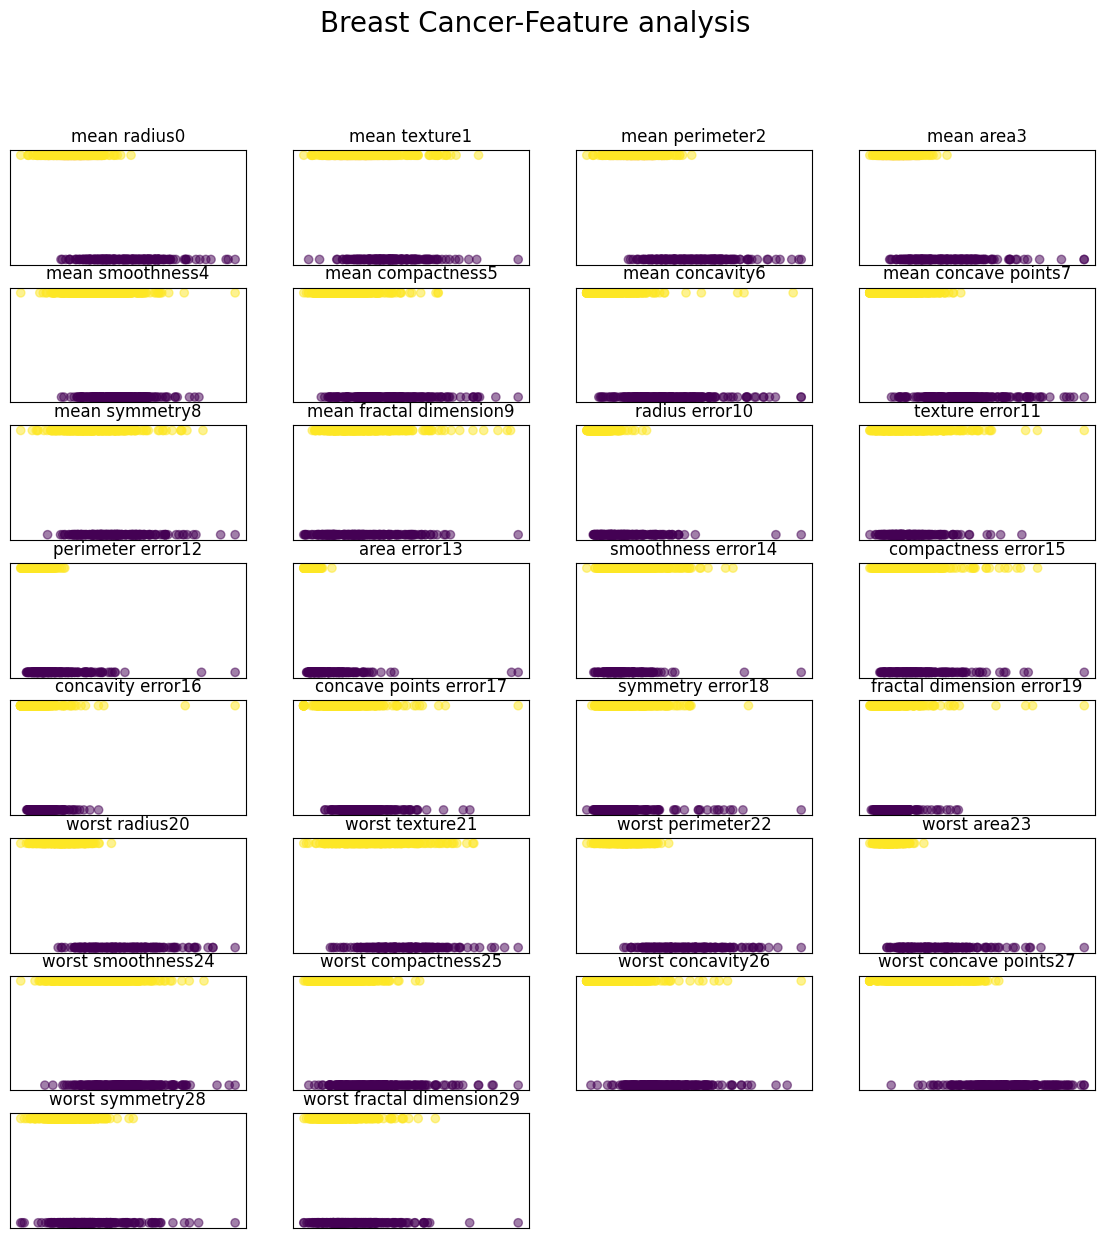

In [ ]:
plt.figure(figsize=(14,14))
plt.suptitle('Breast Cancer-Feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): #30 Features
    plt.subplot(8,4,col+1)
    # _,bins = np.histogram(cancer.data[:,col],bins=20)
    # plt.hist(maligant[:,col],bins=bins,alpha=0.3)
    # plt.hist(benign[:,col],bins=bins,alpha=0.3)
    plt.scatter(cancer.data[:,col], cancer.target, c=cancer.target,alpha=0.5)
    plt.title(cancer.feature_names[col]+('%d' %col))
    plt.xticks([])
    plt.yticks([])

- 파이썬에서 Warning 출력을 없애는 방법.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

- data set split을 10번 반복.

In [ ]:
from sklearn.linear_model import LogisticRegression

scores = []
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    scores.append(score)
print('Scores=',scores)

Scores= [0.9440559440559441, 0.965034965034965, 0.9230769230769231, 0.9440559440559441, 0.9370629370629371, 0.8951048951048951, 0.9230769230769231, 0.9300699300699301, 0.951048951048951, 0.958041958041958]


- reval 참고( https://m.blog.naver.com/wideeyed/221533365486)

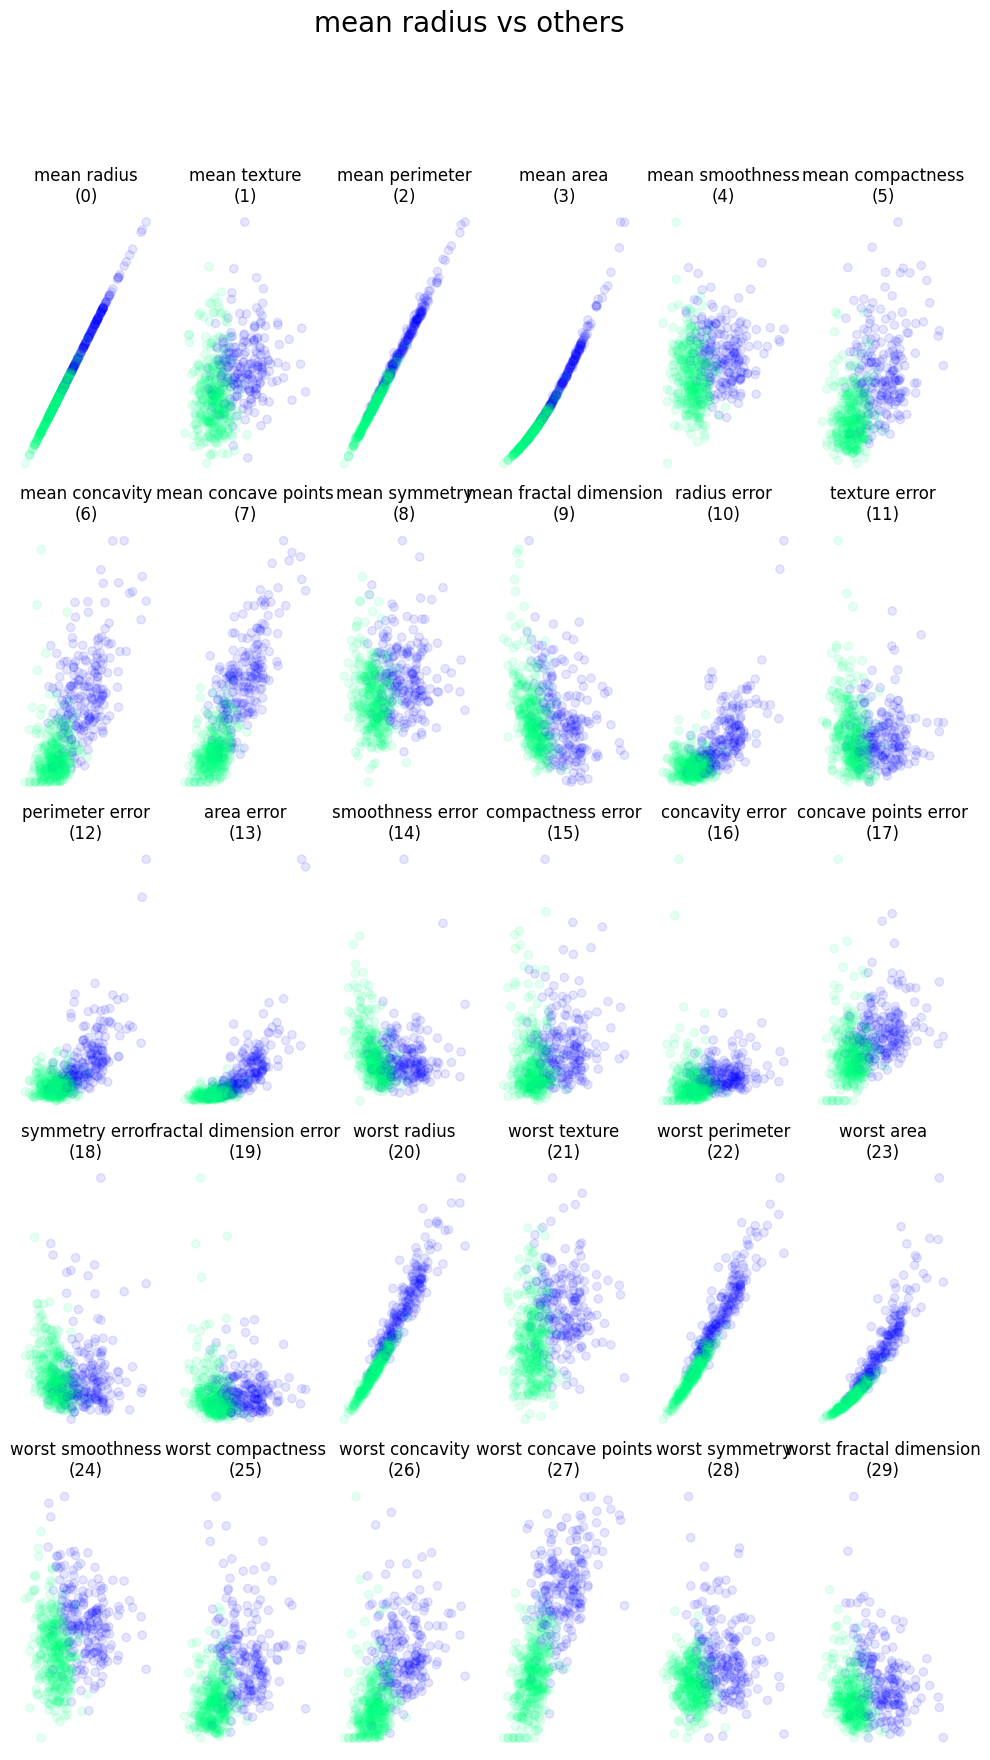

In [ ]:
fig,axes = plt.subplots(5,6,figsize=[12,20])
fig.suptitle('mean radius vs others', fontsize=20)

for i in range(30):
    ax=axes.ravel()[i] #다차원을 1차원으로 펼침.
    ax.scatter(cancer.data[:,0],cancer.data[:,i], c=cancer.target, cmap='winter', alpha=0.1)
    ax.set_title(cancer.feature_names[i]+('\n(%d)' % i))
    ax.set_axis_off()

In [ ]:
#모든 속성에 대해서 한번에 그래프를 그릴수 없으므로 상관관계를 수치를 통해 데이터를 파악한다.
mat = np.corrcoef(cancer.data.T) #열로 읽으므로 Transpose를 시켜줘야함.

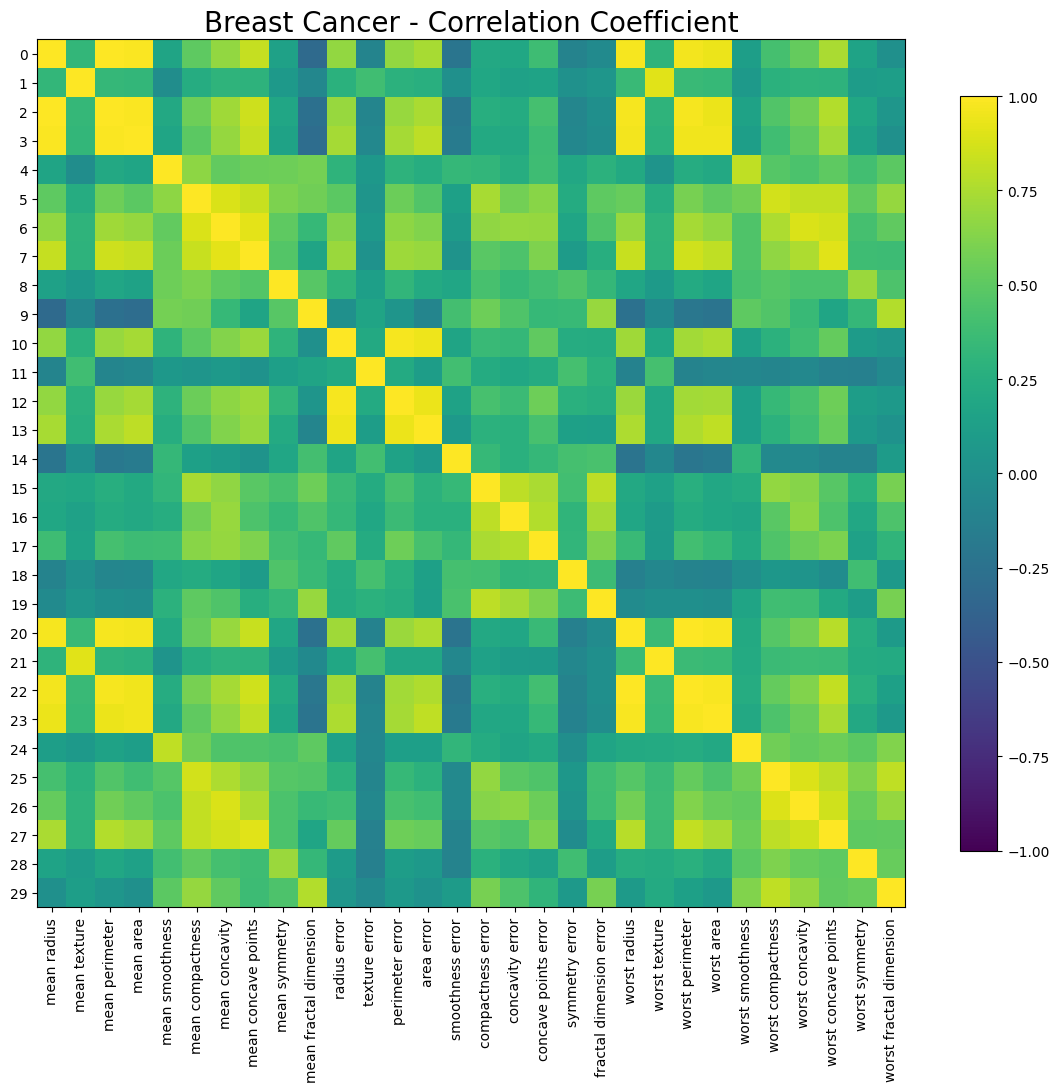

In [ ]:
#모든 속성간의 관계를 한눈에 파악.
fig = plt.figure(figsize=[14,14])
plt.title('Breast Cancer - Correlation Coefficient', fontsize=20)
plt.imshow(mat, interpolation='none',vmin=-1,vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30), cancer.feature_names, rotation=90,ha='center')
plt.yticks(range(30))
print('')

Text(0, 0.5, 'scale')

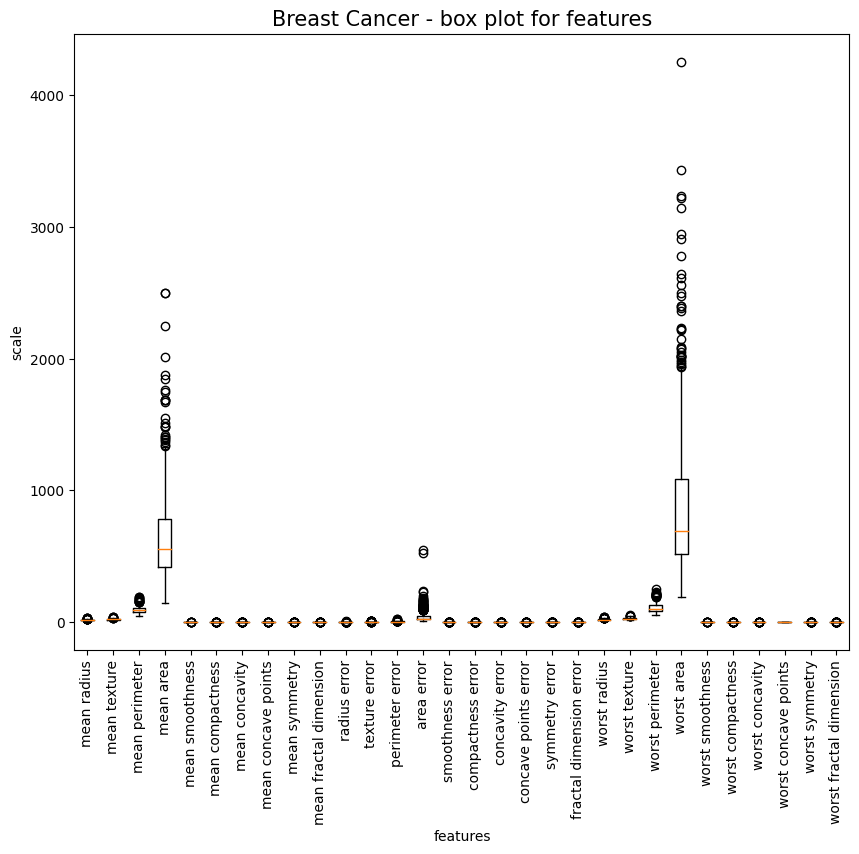

In [ ]:
fig = plt.figure(figsize=[10,8])
plt.title('Breast Cancer - box plot for features', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('scale')

- 단위가 서로 다르기 때문에, cancer.data를 평균은 0 표준편차를 1로 변환

In [ ]:
#속성별 평균
m = cancer.data.mean(axis=0)

#속성별 표준편차
s = cancer.data.std(axis=0)

#정규확인 데이터
data2 = (cancer.data-m)/s

In [ ]:
fig = plt.figure(figsize=[20,15])
plt.boxplot(data2)

- min-max scaler

In [ ]:
m1 = cancer.data.max(axis=0)
m2 = cancer.data.min(axis=0)

data3 = (cancer.data-m2)/(m1-m2)

fig=plt.figure(figsize=[20,15])
plt.boxplot(data3)

# 참고)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train,X_test,y_train,y_test = train_test_split(data3,cancer.target)
# scaler.fit_transform(X_train)
# # scaler.fit_tranfrom(X_test)
# scaler.trnasform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

scores = []
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(data3,cancer.target)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    scores.append(score)
print('Scores=',scores)

Scores= [0.972027972027972, 0.972027972027972, 0.9300699300699301, 0.9440559440559441, 0.9790209790209791, 0.9370629370629371, 0.986013986013986, 0.972027972027972, 0.965034965034965, 0.951048951048951]


In [ ]:
df1 = pd.DataFrame(model.coef_, columns = cancer.feature_names)
df1.T.sort_values(by=0,ascending=False)

- Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                                 random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on test set : {:.3f}'.format(clf.score(X_test,y_test)))

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Feature Importance in tree

In [ ]:
print('Feature importance:')
print(clf.feature_importances_)

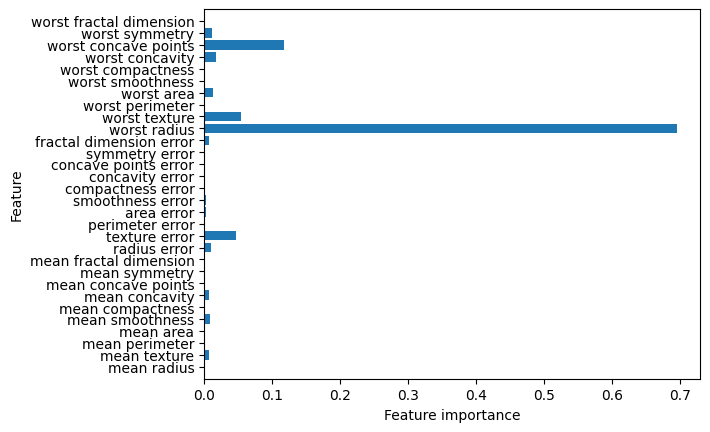

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(clf)

# OpenAPI를 활용한 데이터 수집
링크 : https://www.data.go.kr/data/15094093/openapi.do

In [ ]:
# Python3 샘플 코드 #


import requests

url = 'http://apis.data.go.kr/B551182/hospAsmInfoService/getHospAsmInfo'
params ={'serviceKey' : 'jLmoJkbh6ahxZsr0tXCuPhzB+QZVrctijIUkJ1XZKqWpN0FQcmzY8tYC7jPdKXD6Z6ZmLGzYprBLmw05jPQKPg==', 'pageNo' : '1', 'numOfRows' : '10', 'ykiho' : 'JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ4OSQyNjE4MzIjNTEjJDEjJDYjJDgz' }

response = requests.get(url, params=params)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><addr>\xec\x84\x9c\xec\x9a\xb8\xed\x8a\xb9\xeb\xb3\x84\xec\x8b\x9c \xeb\x8f\x99\xeb\x8c\x80\xeb\xac\xb8\xea\xb5\xac \xeb\xac\xb4\xed\x95\x99\xeb\xa1\x9c 124, (\xec\x9a\xa9\xeb\x91\x90\xeb\x8f\x99)</addr><asmGrd07>4</asmGrd07><asmGrd08>2</asmGrd08><asmGrd09>2</asmGrd09><asmGrd12>\xeb\x93\xb1\xea\xb8\x89\xec\xa0\x9c\xec\x99\xb8</asmGrd12><asmGrd13>\xeb\x93\xb1\xea\xb8\x89\xec\xa0\x9c\xec\x99\xb8</asmGrd13><asmGrd17>3</asmGrd17><asmGrd19>3</asmGrd19><asmGrd23>\xeb\x93\xb1\xea\xb8\x89\xec\xa0\x9c\xec\x99\xb8</asmGrd23><clCd>11</clCd><clCdNm>\xec\xa2\x85\xed\x95\xa9\xeb\xb3\x91\xec\x9b\x90</clCdNm><yadmNm>\xec\x84\x9c\xec\x9a\xb8\xed\x8a\xb9\xeb\xb3\x84\xec\x8b\x9c \xeb\x8f\x99\xeb\xb6\x80\xeb\xb3\x91\xec\x9b\x90</yadmNm><ykiho>JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ4OSQyNjE4MzIjNTEjJDEjJDYjJDgz</ykiho></item></it

In [ ]:
# Python3 샘플 코드

import requests
import urllib.request
import xml.dom.minidom

url = 'http://apis.data.go.kr/B551182/hospAsmInfoService/getHospAsmInfo'
params ={'serviceKey' : 'jLmoJkbh6ahxZsr0tXCuPhzB+QZVrctijIUkJ1XZKqWpN0FQcmzY8tYC7jPdKXD6Z6ZmLGzYprBLmw05jPQKPg==', 'pageNo' : '1', 'numOfRows' : '10', 'ykiho' : 'JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ4OSQyNjE4MzIjNTEjJDEjJDYjJDgz' }

response = requests.get(url, params=params)

# 결과 코드 정의

if(response.status_code==200):
    response_body = response.content
    dom = xml.dom.minidom.parseString(response_body.decode('utf-8'))
    pretty_xml_as_string = dom.toprettyxml()
    print(pretty_xml_as_string)
else:
    print("Error Code:" + response.status_code)

print("[END]")

<?xml version="1.0" ?>
<response>
	<header>
		<resultCode>00</resultCode>
		<resultMsg>NORMAL SERVICE.</resultMsg>
	</header>
	<body>
		<items>
			<item>
				<addr>서울특별시 동대문구 무학로 124, (용두동)</addr>
				<asmGrd07>4</asmGrd07>
				<asmGrd08>2</asmGrd08>
				<asmGrd09>2</asmGrd09>
				<asmGrd12>등급제외</asmGrd12>
				<asmGrd13>등급제외</asmGrd13>
				<asmGrd17>3</asmGrd17>
				<asmGrd19>3</asmGrd19>
				<asmGrd23>등급제외</asmGrd23>
				<clCd>11</clCd>
				<clCdNm>종합병원</clCdNm>
				<yadmNm>서울특별시 동부병원</yadmNm>
				<ykiho>JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIyQzIyQ4OSQyNjE4MzIjNTEjJDEjJDYjJDgz</ykiho>
			</item>
		</items>
		<numOfRows>10</numOfRows>
		<pageNo>1</pageNo>
		<totalCount>1</totalCount>
	</body>
</response>

[END]


#### 개인 건강 데이터를 이용한 심부전 예측 모델

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

- 링크 : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

### https://www.kaggle.com/datasets/mirichoi0218/insurance
* Age: 피보험자의 나이
* Sex: 피보험자의 성별
* BMI: 피보험자의 체질량 지수 - $\frac{Weight\:(kg)}{\left(Height\:(m)\right)^{2}}$
* Children: 피보험자의 자녀의 수
* Smoker: 흡연 여부 (yes / no)
* Region: 피보험자가 거주하는 지역 (Southeast / Southwest / Northeast / Northwest)
* Charges: 보험료